In [68]:
import csv
import numpy as np
import matplotlib.pyplot as mpl

In [69]:
# Set the tolerance level and learning rate
tolerance = 0.000001
learning_rate = 0.005

In [96]:
# Define a function to load data from a CSV file
def load_data(file_name):
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # skip header
        data = [row for row in csv_reader]
        return data

# Define a function to perform linear regression
def linear_regression(b0, b1, x):
    return b0 + b1 * x

# Define a function to calculate the mean squared error
def mean_squared_error(b0, b1, features, targets):
    # Predict target values based on input features and current weights
    predictions = [linear_regression(b0, b1, x) for x in features]
    # Calculate the squared difference between predicted and actual targets
    losses = [(expected - predicted) ** 2 for (expected, predicted) in zip(targets, predictions)]
    # Return the mean of the losses
    return np.sum(losses) / len(features)

In [99]:
train_dataset = load_data("lab_1_train.csv")
features = [float(row[1]) for row in train_dataset]
targets = [float(row[2]) for row in train_dataset]
train_dataset

[['0', '0.0', '20.14901424590337'],
 ['1', '0.010101010101010102', '19.978722729850666'],
 ['2', '0.020202020202020204', '20.234710601834248'],
 ['3', '0.030303030303030304', '20.51751501752847'],
 ['4', '0.04040404040404041', '20.010562068391078'],
 ['5', '0.05050505050505051', '20.030769013925347'],
 ['6', '0.06060606060606061', '20.59497596586434'],
 ['7', '0.07070707070707072', '20.371644560160014'],
 ['8', '0.08080808080808081', '20.020773845835677'],
 ['9', '0.09090909090909091', '20.344586194893974'],
 ['10', '0.10101010101010102', '20.062994894176462'],
 ['11', '0.11111111111111112', '20.082503296151145'],
 ['12', '0.12121212121212122', '20.315012923894052'],
 ['13', '0.13131313131313133', '19.688642189228922'],
 ['14', '0.14141414141414144', '19.765352933074375'],
 ['15', '0.15151515151515152', '20.13434404425801'],
 ['16', '0.16161616161616163', '20.019382987131994'],
 ['17', '0.17171717171717174', '20.437708543212924'],
 ['18', '0.18181818181818182', '20.09122914098'],
 ['19

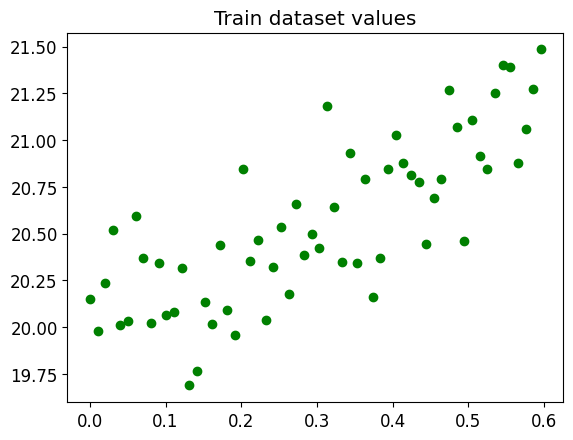

In [100]:
# Set the plot title
mpl.title("Train dataset values")
# Plot the feature values against the target values, 
# using green circle markers ('go') to represent each data point.
mpl.plot(features, targets, 'go')

In [103]:
# Set the random seed for reproducibility
np.random.seed(58)

# Initialize weights with random values
b0, b1 = float(abs(np.random.randn(1))), float(abs(np.random.randn(1)))

# Calculate the initial loss
loss = mean_squared_error(b0, b1, features, targets)

# Initialize delta and iteration counter
delta, i = loss, 0

# Continue iterating until the change in loss falls below the tolerance level
while delta > tolerance:
    # Predict target values based on input features and current weights
    predicted_targets = [linear_regression(b0, b1, feature) for feature in features]
    
    # Calculate the difference between predicted and actual targets
    actual_predicted_difference = [(actual - predicted) for (actual, predicted) in zip(targets, predicted_targets)]
    
    # Calculate the derivative of the loss function with respect to b0
    derivative_b0 = -2  * np.sum(actual_predicted_difference) / len(features)
    
    # Calculate the derivative of the loss function with respect to b1
    derivative_b1 = (-2 / len(features)) * np.sum([(x * difference_value) for (x, difference_value) in zip(features, actual_predicted_difference)])
    
    # Update weights using the learning rate and derivatives
    b0 -= learning_rate * derivative_b0
    b1 -= learning_rate * derivative_b1
    
    # Calculate the new loss
    new_loss = mean_squared_error(b0, b1, features, targets)
    
    # Print the current weights and loss function value
    print(f'Iteration {i}: b0 = {b0}, b1 = {b1}, loss = {new_loss}')
    
    # Calculate the change in loss
    delta = loss - new_loss
    
    # Update the loss
    loss = new_loss
    
    # Increment the iteration counter
    i += 1
# Print the resulting values
print("\n\tResults:\nIterations = {}\nBeta0 = {}\nBeta1 = {}\nLoss function value = {}".format(i, b0, b1, loss))

Iteration 0: b0 = 0.9518176208332713, b1 = 2.1586487416800644, loss = 359.3475446607941
Iteration 1: b0 = 1.1413627393757713, b1 = 2.215074318379198, loss = 351.5679865091584
Iteration 2: b0 = 1.3288442699133893, b1 = 2.270867720965788, loss = 343.9572957540179
Iteration 3: b0 = 1.5142847320773176, b1 = 2.326035853284179, loss = 336.51180663425725
Iteration 4: b0 = 1.6977063997303752, b1 = 2.3805855438320864, loss = 329.2279329649655
Iteration 5: b0 = 1.8791313036492088, b1 = 2.4345235465828945, loss = 322.102166409999
Iteration 6: b0 = 2.0585812341772227, b1 = 2.487856541798981, loss = 315.1310747920435
Iteration 7: b0 = 2.236077743848555, b1 = 2.540591136836165, loss = 308.311300439361
Iteration 8: b0 = 2.411642149983417, b1 = 2.5927338669393754, loss = 301.639558568425
Iteration 9: b0 = 2.5852955372551074, b1 = 2.644291196029635, loss = 295.11263570166636
Iteration 10: b0 = 2.757058760229014, b1 = 2.6952695174824592, loss = 288.7273881195658
Iteration 11: b0 = 2.926952445873903, b1 

Iteration 4872: b0 = 19.530541836414944, b1 = 3.3793626847415097, loss = 0.13320674280457703
Iteration 4873: b0 = 19.53066223186018, b1 = 3.3789699746971356, loss = 0.13317300428679946
Iteration 4874: b0 = 19.530782593547563, b1 = 3.378577374765307, loss = 0.1331392846863541
Iteration 4875: b0 = 19.530902921486554, b1 = 3.3781848849151492, loss = 0.13310558399263425
Iteration 4876: b0 = 19.53102321568662, b1 = 3.377792505115796, loss = 0.1330719021950387
Iteration 4877: b0 = 19.53114347615722, b1 = 3.377400235336391, loss = 0.1330382392829724
Iteration 4878: b0 = 19.531263702907808, b1 = 3.3770080755460845, loss = 0.13300459524584626
Iteration 4879: b0 = 19.53138389594784, b1 = 3.376616025714037, loss = 0.13297097007307684
Iteration 4880: b0 = 19.53150405528677, b1 = 3.376224085809417, loss = 0.13293736375408702
Iteration 4881: b0 = 19.53162418093405, b1 = 3.375832255801402, loss = 0.1329037762783049
Iteration 4882: b0 = 19.531744272899118, b1 = 3.3754405356591772, loss = 0.13287020763

Iteration 7390: b0 = 19.74800171121491, b1 = 2.6700445131638126, loss = 0.08769256999261002
Iteration 7391: b0 = 19.74806113276685, b1 = 2.6698506898821033, loss = 0.08768435146790014
Iteration 7392: b0 = 19.748120537657492, b1 = 2.6696569209467884, loss = 0.08767613755135265
Iteration 7393: b0 = 19.74817992589151, b1 = 2.6694632063426296, loss = 0.08766792824038351
Iteration 7394: b0 = 19.748239297473575, b1 = 2.6692695460543927, loss = 0.08765972353241051
Iteration 7395: b0 = 19.748298652408355, b1 = 2.6690759400668482, loss = 0.08765152342485254
Iteration 7396: b0 = 19.748357990700516, b1 = 2.6688823883647705, loss = 0.0876433279151306
Iteration 7397: b0 = 19.74841731235473, b1 = 2.6686888909329385, loss = 0.08763513700066584
Iteration 7398: b0 = 19.748476617375655, b1 = 2.6684954477561353, loss = 0.08762695067888253
Iteration 7399: b0 = 19.74853590576796, b1 = 2.6683020588191484, loss = 0.087618768947205
Iteration 7400: b0 = 19.748595177536302, b1 = 2.668108724106769, loss = 0.0876

Iteration 10158: b0 = 19.86241152541407, b1 = 2.29685860798047, loss = 0.07613843428054949
Iteration 10159: b0 = 19.862438867430374, b1 = 2.296769422842161, loss = 0.07613669420958406
Iteration 10160: b0 = 19.862466201780208, b1 = 2.296680262710604, loss = 0.07613495511428395
Iteration 10161: b0 = 19.862493528465723, b1 = 2.2965911275787874, loss = 0.07613321699410222
Iteration 10162: b0 = 19.86252084748907, b1 = 2.2965020174397006, loss = 0.07613147984849165
Iteration 10163: b0 = 19.862548158852395, b1 = 2.2964129322863367, loss = 0.07612974367690635
Iteration 10164: b0 = 19.862575462557846, b1 = 2.2963238721116896, loss = 0.07612800847880001
Iteration 10165: b0 = 19.862602758607572, b1 = 2.2962348369087557, loss = 0.07612627425362653
Iteration 10166: b0 = 19.86263004700372, b1 = 2.296145826670533, loss = 0.07612454100084082
Iteration 10167: b0 = 19.862657327748433, b1 = 2.2960568413900213, loss = 0.07612280871989727
Iteration 10168: b0 = 19.86268460084386, b1 = 2.295967881060223, los

In [104]:
test_dataset = load_data("lab_1_test.csv")
test_dataset

[['0', '0.6060606060606061', '21.068368940767623'],
 ['1', '0.6161616161616162', '21.176625539324085'],
 ['2', '0.6262626262626263', '20.920624760323445'],
 ['3', '0.6363636363636365', '20.91386528550307'],
 ['4', '0.6464646464646465', '21.536687039647553'],
 ['5', '0.6565656565656566', '21.720003321702563'],
 ['6', '0.6666666666666667', '21.31173029685923'],
 ['7', '0.6767676767676768', '21.65459522290296'],
 ['8', '0.686868686868687', '21.482228181251664'],
 ['9', '0.696969696969697', '21.20040346755786'],
 ['10', '0.7070707070707072', '21.52256009579394'],
 ['11', '0.7171717171717172', '21.895754404283228'],
 ['12', '0.7272727272727273', '21.443797642812466'],
 ['13', '0.7373737373737375', '21.944140571491676'],
 ['14', '0.7474747474747475', '20.70902596372257'],
 ['15', '0.7575757575757577', '21.761722266464083'],
 ['16', '0.7676767676767677', '21.561467655824988'],
 ['17', '0.7777777777777778', '21.4658533504158'],
 ['18', '0.787878787878788', '21.603285808718226'],
 ['19', '0.797

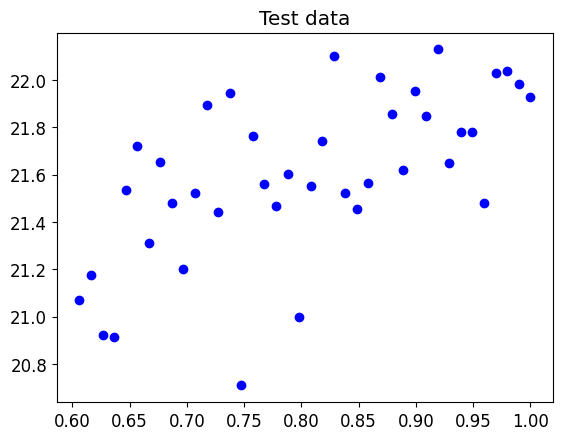

In [105]:
test_features = [float(row[1]) for row in test_dataset]
test_targets = [float(row[2]) for row in test_dataset]

mpl.title("Test data")
mpl.plot(test_features, test_targets, 'bo')

In [106]:
mean_squared_error(b0, b1, test_features, test_targets)

0.0797303664689667

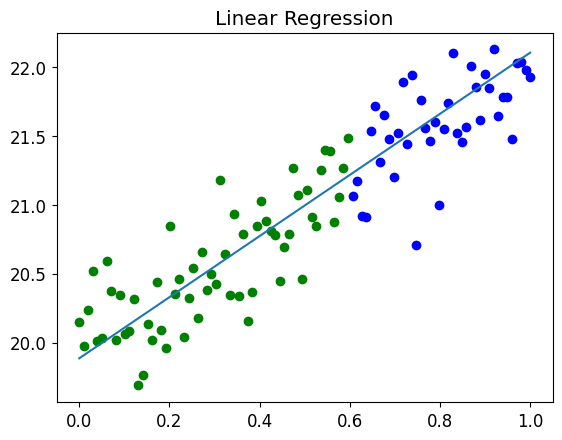

In [107]:
mpl.title("Linear Regression")
mpl.plot(features, targets, 'go',
         test_features, test_targets, 'bo',
         [0, 1], [linear_regression(b0, b1, 0), linear_regression(b0, b1, 1)]
         )